<a href="https://colab.research.google.com/github/rodrigosguima/rodrigosguima/blob/main/Regress%C3%A3o_Log%C3%ADstica_Dados_Corretor_de_Im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
##Modelo de classificação semelhante a regressão Linear porém com retorno binário (0,1)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
Base_Dados = pd.read_excel('BaseDados_RegressaoLogistica.xlsx', 'Plan1')

In [8]:
Base_Dados.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


Tipo Renda: 1=Assalariado, 2=Autônomo, 3=Empresário;
Possui Imovel: 1=Sim, 2=Não;
Comprou: 0=Não, 1=Sim

In [10]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [9]:
Base_Dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


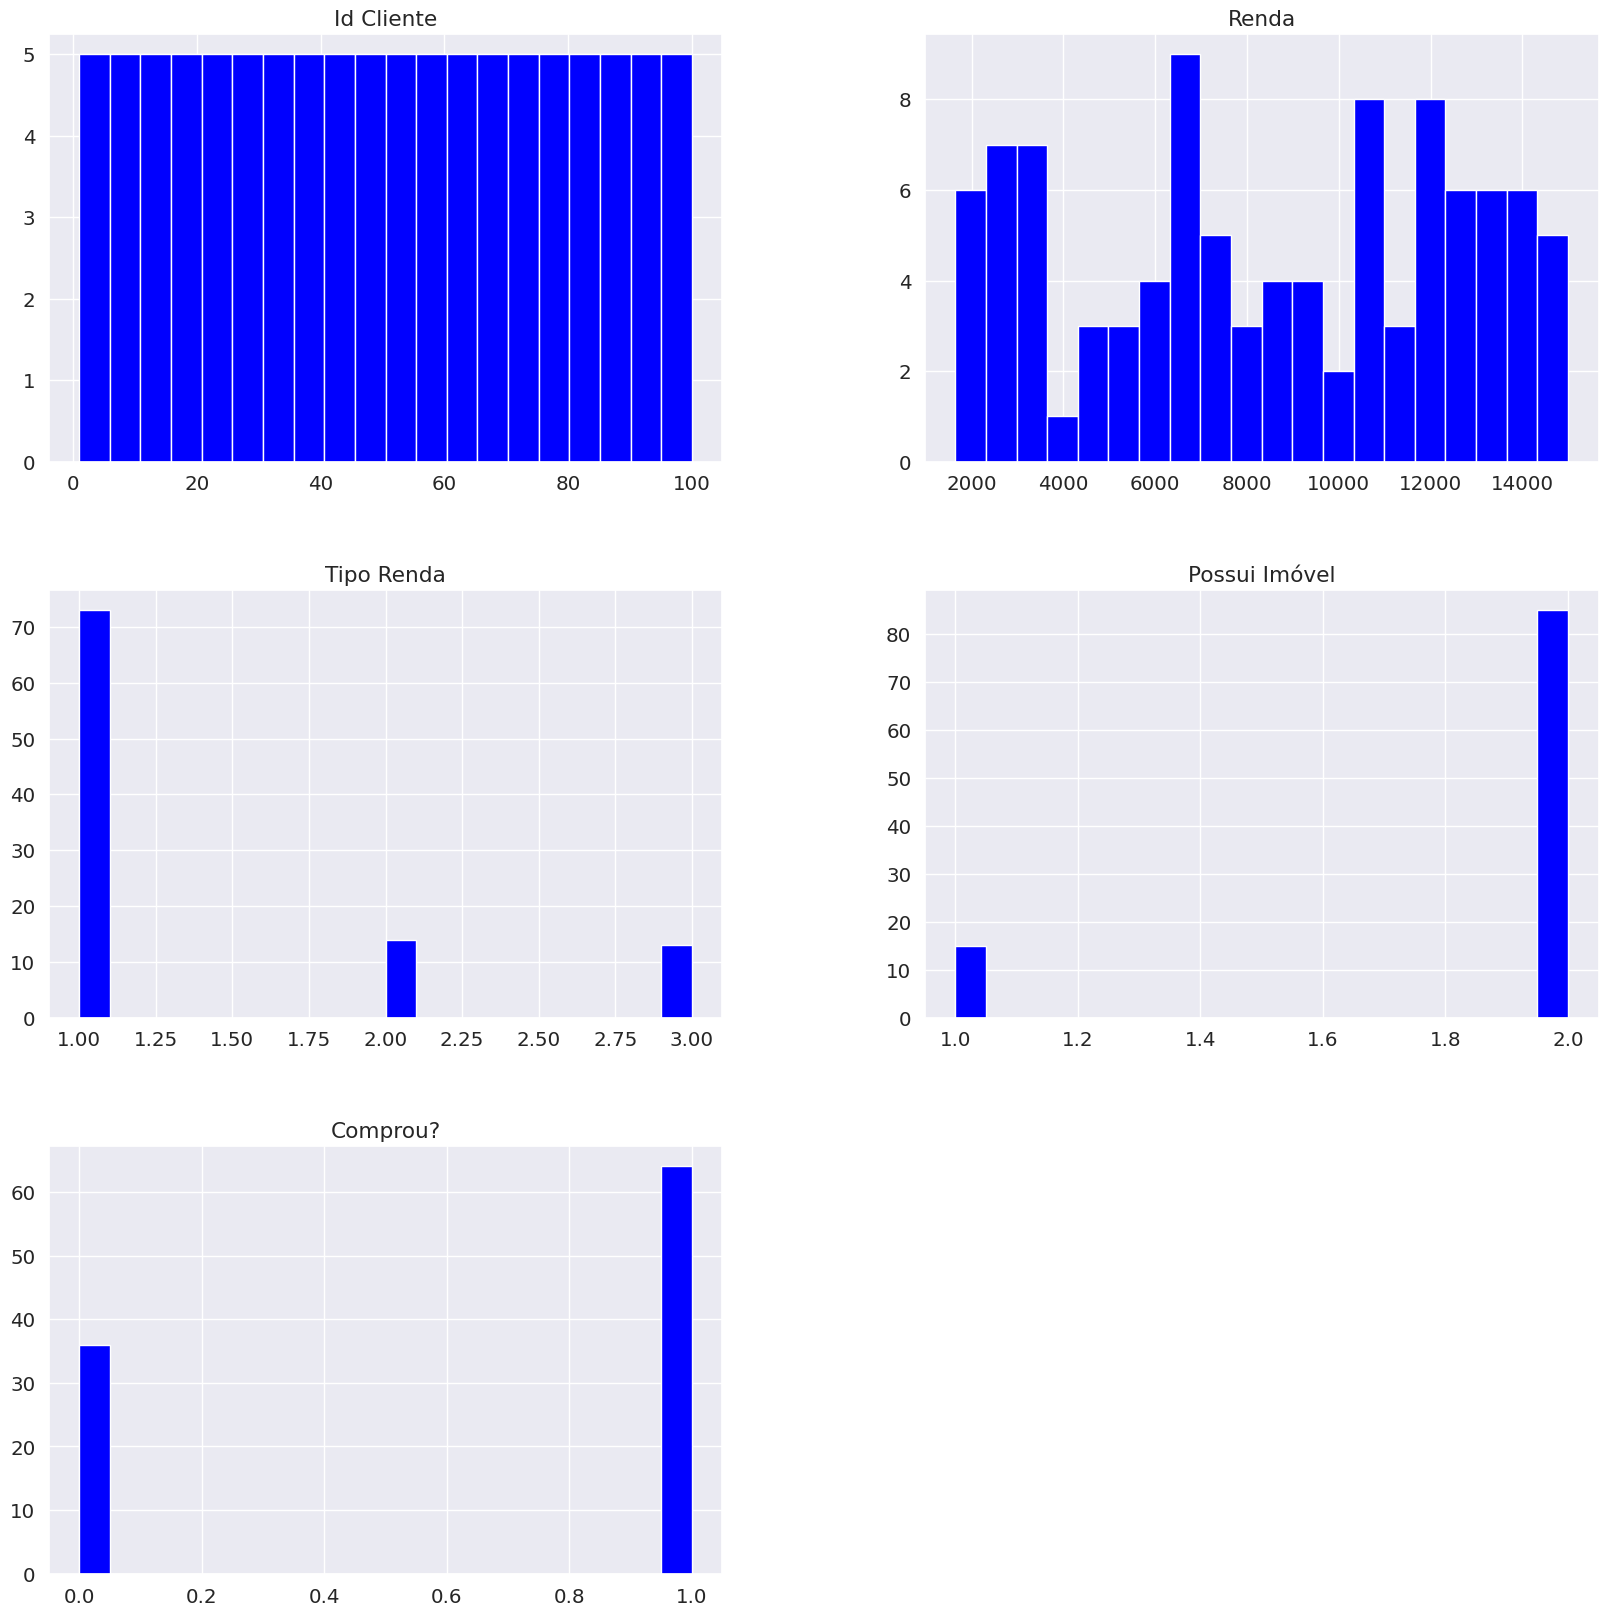

In [46]:
#Análise Exploratória

sns.set( font_scale=1.3, rc={ 'figure.figsize':(20,20) } )
eixo = Base_Dados.hist( bins=20, color='blue')

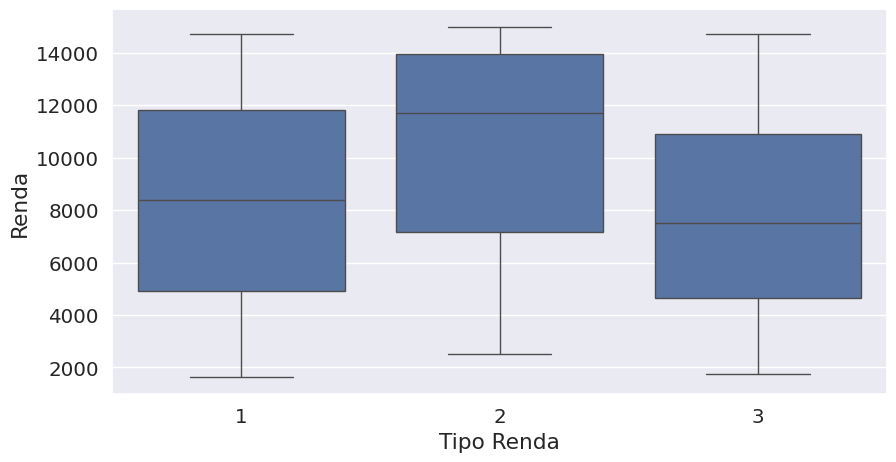

In [47]:
plt.figure( figsize=(10,5) )
sns.boxplot( data = Base_Dados, x='Tipo Renda', y='Renda');

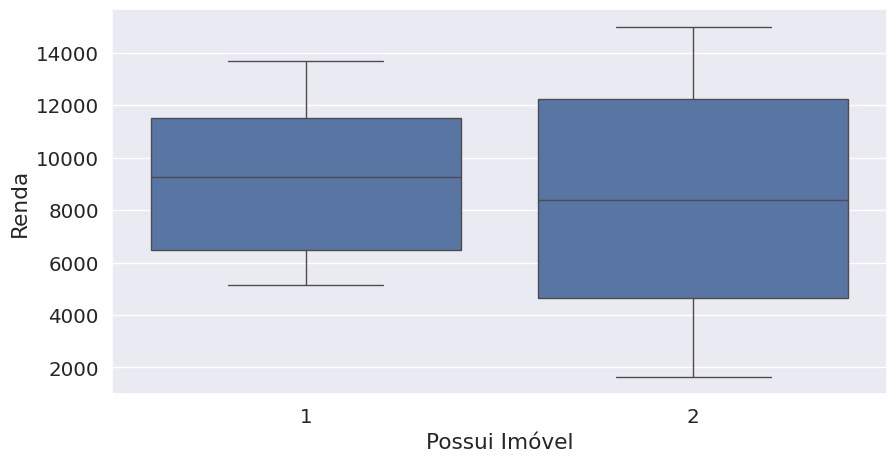

In [48]:
plt.figure( figsize=(10,5) )
sns.boxplot( data = Base_Dados, x='Possui Imóvel', y='Renda');

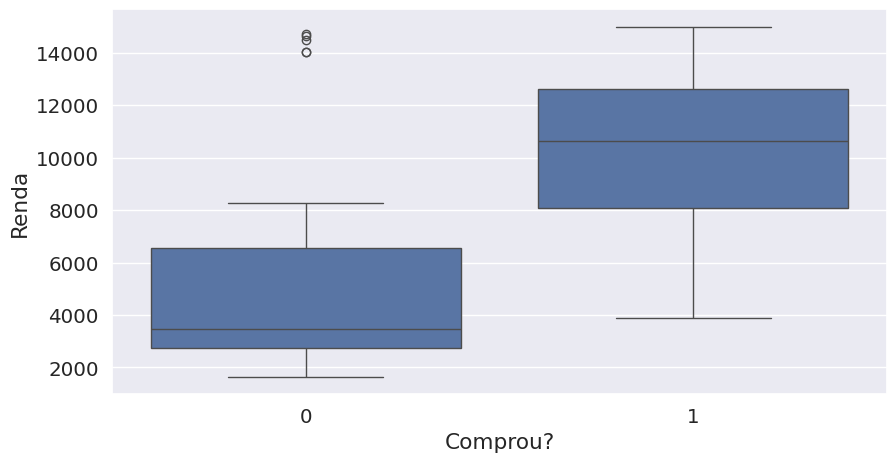

In [16]:
plt.figure( figsize=(10,5) )
sns.boxplot( data = Base_Dados, x='Comprou?', y='Renda');

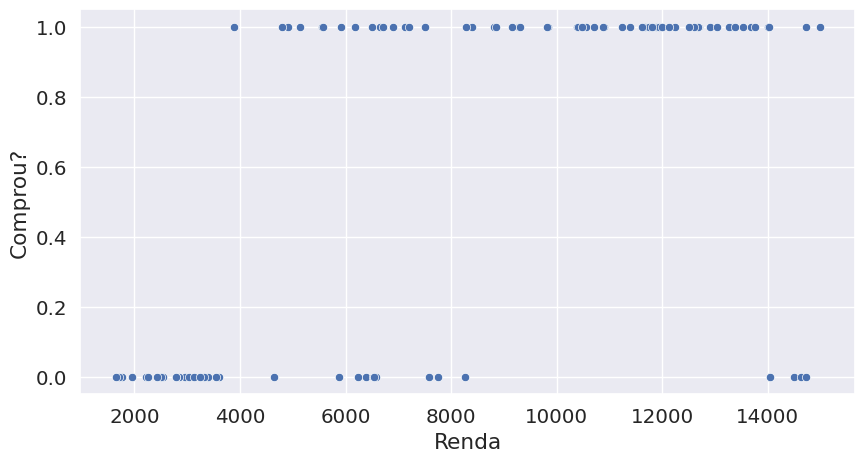

In [17]:
plt.figure( figsize=(10,5) )
sns.scatterplot( data=Base_Dados, x='Renda', y='Comprou?');

In [18]:
##Modelo Regressão Logística

Caracteristica = Base_Dados.iloc[:,1:4].values
Previsor = Base_Dados.iloc[:,4:5].values

In [19]:
Caracteristica

array([[10480,     1,     2],
       [ 6182,     2,     2],
       [ 6387,     3,     1],
       [ 6528,     1,     2],
       [ 8269,     1,     2],
       [ 6903,     1,     2],
       [ 1947,     1,     2],
       [14008,     1,     2],
       [ 2213,     1,     2],
       [13321,     2,     2],
       [14043,     3,     2],
       [ 5561,     1,     2],
       [11890,     1,     2],
       [13308,     1,     2],
       [11666,     1,     2],
       [ 3395,     1,     2],
       [ 8854,     2,     2],
       [ 1760,     3,     2],
       [ 7761,     1,     2],
       [ 2952,     1,     2],
       [ 4904,     1,     2],
       [ 2262,     1,     2],
       [13274,     1,     2],
       [ 2546,     1,     2],
       [10393,     2,     2],
       [10901,     3,     2],
       [ 9271,     1,     1],
       [11230,     1,     1],
       [12908,     1,     1],
       [ 6543,     1,     1],
       [11742,     1,     2],
       [ 6578,     2,     2],
       [10555,     3,     1],
       [ 8

In [20]:
Previsor

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [28]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split( Caracteristica,
                                                        Previsor,
                                                        test_size=0.20 )

In [29]:
print( len(x_treino) )
print( len(x_teste) )
print( len(y_treino) )
print( len(y_teste) )

80
20
80
20


In [30]:
from sklearn.linear_model import LogisticRegression


Funcao_Logistica = LogisticRegression()
Funcao_Logistica.fit(x_treino, y_treino)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
Previsoes = Funcao_Logistica.predict( x_teste )

In [32]:
Previsoes

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
y_teste

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [36]:
##Matriz de confusão

from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, Previsoes )

array([[ 1,  4],
       [ 3, 12]])

In [37]:
from sklearn.metrics import classification_report

print(classification_report( y_teste, Previsoes ) )

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.75      0.80      0.77        15

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.62      0.65      0.64        20



recall = Quanto o modelo acertou no teste e precision seria qual a precisão que ele tem na classificação.

In [45]:
##Previsões

#Novo cliente que chegou na tenda!!!

Salario = 4000
Tipo_Renda = 3
Possui_Imovel = 1

Parametro = [[ Salario, Tipo_Renda, Possui_Imovel ]]

Fazendo_Previsao = Funcao_Logistica.predict( Parametro )
Probabilidade = Funcao_Logistica.predict_proba( Parametro )

if Fazendo_Previsao == 0:
  print('Não irá comprar')
  print( Probabilidade )

else:
    print('Vai comprar \o/')
    print( Probabilidade )


Não irá comprar
[[0.76346401 0.23653599]]


<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2983302022.py:19: SyntaxWarning: invalid escape sequence '\o'
  print('Vai comprar \o/')
